## Exercise -K-means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


In [ ]:
# cluster 
x1 = [1,3,4,5,1,4,1,2]  
y1 = [3,3,3,3,2,2,1,1]
X=np.array(list(zip(x1,y1)))

X

array([[1, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [1, 2],
       [4, 2],
       [1, 1],
       [2, 1]])

In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=2).fit(X)　#init = kmeans ++ 表示 找點的初始值不為隨機 而是其中一個點 n_cluster = 2表示總共分成兩群

In [ ]:
kmeans.cluster_centers_ #這邊跑完kmeans了 用 center可以找出兩群的中心點 得到一個2D array

array([[4.  , 2.75],
       [1.25, 1.75]])

In [ ]:
kmeans.labels_ #這邊出來表示分群 0的點為一群 1的點為一群 分群分群!!!!!!

array([1, 0, 0, 0, 1, 0, 1, 1])

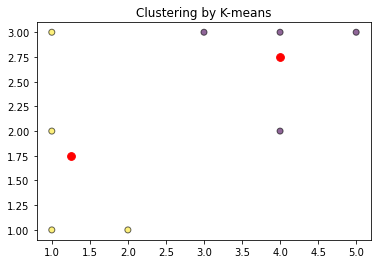

In [ ]:
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


## Apply K-means with re-scaled data

## Feature Re-scale 

In [ ]:
X_train=X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[2.625 2.25 ]
[1.49478259 0.8291562 ]


In [ ]:
#transform: (x-u)/std.
X_train_std = sc.transform(X)
X_train_std

array([[-1.08711461,  0.90453403],
       [ 0.2508726 ,  0.90453403],
       [ 0.91986621,  0.90453403],
       [ 1.58885982,  0.90453403],
       [-1.08711461, -0.30151134],
       [ 0.91986621, -0.30151134],
       [-1.08711461, -1.50755672],
       [-0.41812101, -1.50755672]])

In [ ]:
np.round(np.mean(X_train_std,axis=0),2)

array([0., 0.])

In [ ]:
np.std(X_train_std,axis=0)

array([1., 1.])

In [ ]:
kmeans_std = KMeans(init='k-means++',n_clusters=2, random_state=0).fit(X_train_std)
kmeans_std 

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans_std.labels_

array([0, 1, 1, 1, 0, 1, 0, 0])

####  Coordinates of cluster centers

In [ ]:
kmeans_std.cluster_centers_

array([[-0.91986621, -0.60302269],
       [ 0.91986621,  0.60302269]])

### plot

In [ ]:
kmeans_std.predict(X_train_std)

array([0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
X_train_std[kmeans_std.predict(X_train_std)==0]

array([[-1.08711461,  0.90453403],
       [-1.08711461, -0.30151134],
       [-1.08711461, -1.50755672],
       [-0.41812101, -1.50755672]])

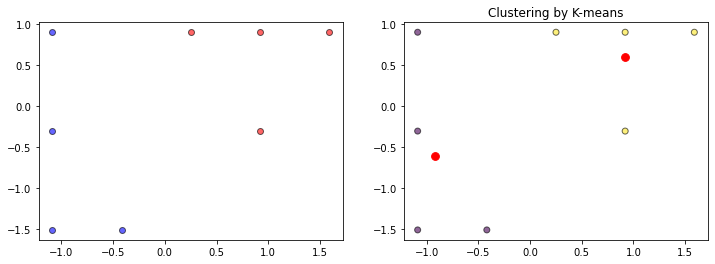

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(X_train_std[kmeans_std.predict(X_train_std)==0],color='b')
plot_scatter(X_train_std[kmeans_std.predict(X_train_std)==1],color='r')
#plot_scatter(X_train_std[4:],color='r')
plt.subplot(122)
plot_scatter(X_train_std,kmeans_std.predict(X_train_std))
plt.scatter(kmeans_std.cluster_centers_[:,0],kmeans_std.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()


### Score

In [ ]:
def distance(x, y):   
    return np.sum((x - y) ** 2)


def score(x,model):
    '''
    cluster: sample pointes 
    '''
    score=0 
    n_cluster=len(model.cluster_centers_)
    for c in range(n_cluster):
         score+=distance(x[model.labels_==c],model.cluster_centers_[c])
    
    return score


In [ ]:
score(X_train,kmeans)

6.25

In [ ]:
score(X_train_std,kmeans_std)

6.321678321678322

In [ ]:
kmeans_std.inertia_ 

6.321678321678322